Experiment 3: Understand supervised learning to train and develop classifier models.

Software Used: Google colaboratory

# **PyCaret for Classification**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self Learning Resource**
1. Tutorial on Pycaret <a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a> 

2. Documentation on Pycaret-Classification: <a href="https://pycaret.org/Classification/"> Click Here </a>

---

### **In this experiment we will learn:**

- Getting Data: How to import data from PyCaret repository
- Setting up Environment: How to setup an experiment in PyCaret and get started with building regression models
- Create Model: How to create a model, perform cross validation and evaluate regression metrics
- Tune Model: How to automatically tune the hyperparameters of a regression model
- Plot Model: How to analyze model performance using various plots
- Finalize Model: How to finalize the best model at the end of the experiment
- Predict Model: How to make prediction on new / unseen data
- Save / Load Model: How to save / load a model for future use

---



#### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


#### **(b) Get the version of the pycaret**

In [ ]:
from pycaret.utils import version
version()

'2.3.2'

---
# **1. Classification: Basics**
---

### **1.1 Loading Dataset - Loading dataset from pycaret**

In [2]:
from pycaret.datasets import get_data

# No output

---
### **1.2 Get the list of datasets available in pycaret (55)**
---

In [3]:
# Internet connection is required
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.3 Get diabetes dataset**
---

In [4]:
diabetesDataSet = get_data("diabetes")    # SN is 7
# This is binary classification dataset. The values in "Class variable" have two (binary) values.

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Read data from file

In [ ]:
# import pandas as pd
# diabetesDataSet = pd.read_csv("myFile.csv")

---
# ** Classification**
---

 If you don’t want PyCaret to display the dialogue for confirmation of data types you may pass silent as True within setup to perform a unattended run of experiment.

### **3.1 Build a single model - "RandomForest"**

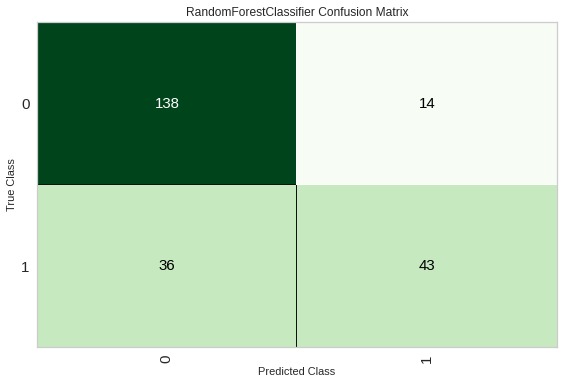

In [8]:
#from pycaret.datasets import get_data
from pycaret.classification import *

#diabetesDataSet = get_data("diabetes")
s = setup(data=diabetesDataSet, target='Class variable', silent=True)

rfModel = create_model('rf')
plot_model(rfModel, plot='confusion_matrix')
#Explore more parameters

---
### **3.2 Other models**
---
```
-	'ada' -	Ada Boost Classifier
-	'dt' -	Decision Tree Classifier
-	'et' -	Extra Trees Classifier
-	'gbc' -	Gradient Boosting Classifier
-	'knn' -	K Neighbors Classifier
-	'lightgbm' -	Light Gradient Boosting Machine
-	'lda' -	Linear Discriminant Analysis
-	'lr' -	Logistic Regression
-	'nb' -	Naive Bayes
-	'qda' -	Quadratic Discriminant Analysis
-	'rf' -	Random Forest Classifier
-	'ridge' -	Ridge Classifier
-	'svm' -	SVM - Linear Kernel
```

---
### **3.3 Save the trained model**
---

In [7]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Successfully Saved


---
### **3.5 Make prediction on the new dataset**
---

#### **Get new dataset**

In [9]:
# Select top 10 rows from diabetes dataset
newDataSet = get_data("diabetes").iloc[:10]

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Make prediction on new dataset**

In [11]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.59
1,1,85,66,29,0,26.6,0.351,31,0,0,0.82
2,8,183,64,0,0,23.3,0.672,32,1,1,0.89
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.85
5,5,116,74,0,0,25.6,0.201,30,0,0,0.95
6,3,78,50,32,88,31.0,0.248,26,1,0,0.90
7,10,115,0,0,0,35.3,0.134,29,0,0,0.79
8,2,197,70,45,543,30.5,0.158,53,1,1,0.91
9,8,125,96,0,0,0.0,0.232,54,1,0,0.71


---
### **3.6 Save prediction results to csv**
---

In [12]:
newPredictions.to_csv("NewPredictions.csv")
# No output

---
### **3.8 Feature Importance**
---

##### **3.8.1 Feature Importance using Random Forest**

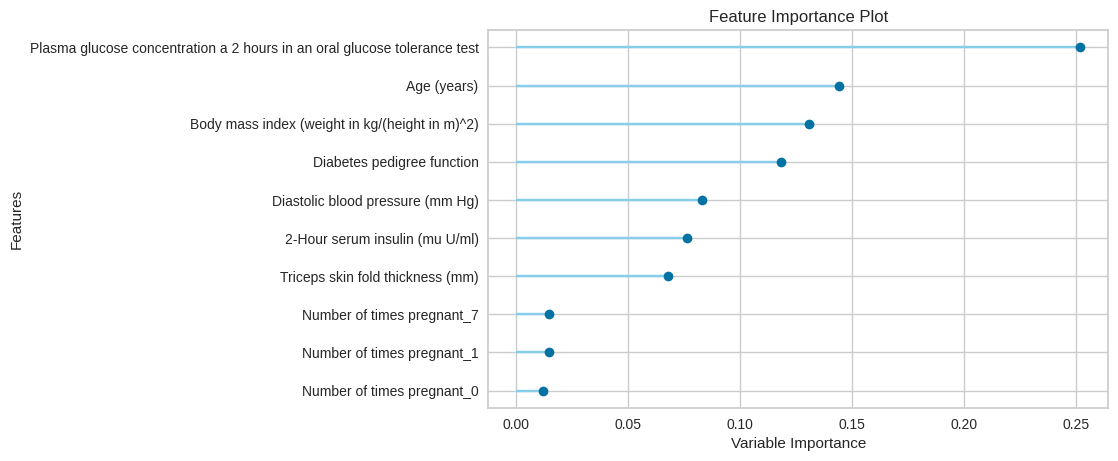

In [14]:
rfModel = create_model('rf', verbose=True)
plot_model(rfModel, plot='feature')

#### **Self Learning Resource**

###### 1. Tutorial on Pycaret <a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a> 

###### 2. Documentation on Pycaret-Classification: <a href="https://pycaret.org/Classification/"> Click Here </a>

**Task:** Train and Develope a classifier model, save and load it. Make classification on a new dataset. Yoy can refer \"PyCaret\" for classification dataset.